<a href="https://colab.research.google.com/github/liofval/GCI/blob/main/GCI%E3%83%98%E3%82%99%E3%83%BC%E3%82%B7%E3%83%83%E3%82%AF_%E6%BC%94%E7%BF%92_%E5%9B%9E%E5%B8%B0%E3%82%B3%E3%83%BC%E3%82%B9_%E3%83%AC%E3%83%98%E3%82%99%E3%83%AB0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**回帰コース**


---


回帰コースでは、**数値を予測する機械学習モデル「線形回帰」**を取り扱い、**「データの理解→データの前処理→モデルの構築・評価」**という一連の流れを通して、各レベルに応じてデータ分析に必要な知識の習得を目指します。

#レベル０（☆☆☆☆）


---
レベル０では、本コースで扱う線形回帰について紹介します。そして、データの特徴や簡単な前処理方法について学びます。


##0.1.機械学習モデル「線形回帰」

**線形回帰**は、**説明変数**（予測するための変数）と**目的変数**（予測したい変数）の関係を直線で表現する手法です。説明変数を入力したときに出力される目的変数の予測値が、実際の目的変数に近づくように学習させます。説明変数が1つの場合は**単回帰分析**、説明変数が複数の場合は**重回帰分析**と呼ばれます。


**単回帰分析**では y を目的変数、x を説明変数とした時、2つのデータ間の関係性を

\begin{eqnarray}
y = ax + b
\end{eqnarray}

という一次方程式の形で表します。係数 $a$ と切片 $b$ が判明すれば、$x$ を代入することで、$y$ を予測することができます。以下の散布図では、学習によって $a$ = 0.3、$b$ = 0.8と推定されました。


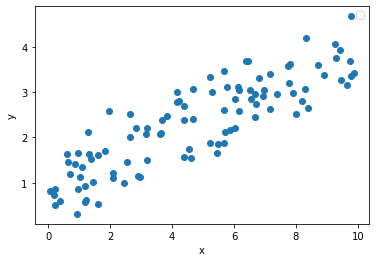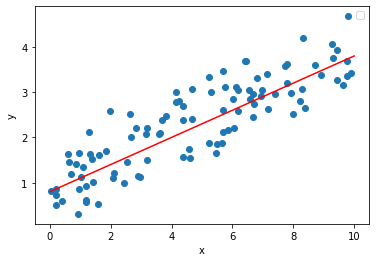

**重回帰分析**では、$y$を目的変数、$x_1$, $x_2$, $\cdots$, $x_n$を説明変数としたとき、複数のデータ間の関係性を次のような一次方程式の形で表します。
\begin{eqnarray}
y = a_1 \cdot x_1 + a_2 \cdot x_2 + \cdots + a_n \cdot x_n + b
\end{eqnarray}

ここで、$a_1$, $a_2$, $\cdots$, $a_n$は各説明変数に対応する回帰係数であり、$b$は切片です。これらの係数と切片が判明すれば、各説明変数 $x_1$, $x_2$, $\cdots$, $x_n$ の値を代入することで、$y$ を予測することができます。



例えば、下記のような自動車価格に関する表データがあったとします。ここで、自動車の情報からその価格を予測することが目的であれば、表のうち価格に関する列が目的変数に相当し、車体の幅(width)やエンジンの大きさ(engine-size)に関する列の情報が説明変数となります。

| ID  | width | engine-size | price |
|-----|--------|--------|---|
| 001 | 65        | 120        |12000 |
| 002 | 70        | 115        |15000|
| 003 | 66        | 130        |13500|
| 004 | 64        | 133       |12100|
| 005 | 67        | 127       |14200|

今回は重回帰分析ですが、説明変数が2つの場合には、以下のような式で表されます。
\begin{eqnarray}
y = a_1 \cdot x_1 + a_2 \cdot x_2  + b
\end{eqnarray}

ここでa1が940、a2が130、bが-65000であるとします。
これらの値を式に代入すると、次のようになります。
\begin{eqnarray}
y = 940 \cdot x_1 + 130 \cdot x_2  - 65000
\end{eqnarray}

よって、予測値は以下の表のpred_price列のようになります。


| ID  | width | engine-size | price | pred_price |
|-----|--------|--------|---|-----|
| 001 | 65        | 120        |12000 | 11700|
| 002 | 70        | 115        |15000| 15750 |
| 003 | 66        | 130        |13500| 13940 |
| 004 | 64        | 133       |12100| 12450 |
| 005 | 67        | 127       |14200| 14490 |

##0.2.データの理解

データの理解で重要なデータの種類について学んでいきましょう。

さきほどの表データのうち、車体の幅やエンジンの大きさなどの特徴を表すデータを**特徴量**と呼びます。特徴量は、**量的データ**と**質的データ**に分けられます。量的データは、さきほどの幅や大きさなどの連続値で表現できるデータです。一方、質的データは、燃料の種類、ハイブリッド車か否かといったカテゴリーを表すデータです。必ずしも2つに分類されるわけではなく、自動車の色のような3つ以上のカテゴリーもあります。
線形回帰では、量的データだけでなく質的データもダミー変数化することで扱えるようになります。


ダミー変数化とはあらかじめ表データにある質的データの文字をコンピュータで扱いやすいように数値化する前処理のことです。
質的データの特徴量を持つ自動車のデータには、以下の表のような例が挙げられます。

| ID  | color | fuel-type |
|-----|------|------|
| 001 | white | diesel |
| 002 | black | gas |
| 003 | white | gas |
| 004 | black | diesel |

例えば、自動車の色と燃料のタイプという質的データを1と0になるよう上の表データをダミー変数化すると、次のようになります。


| ID  | color | fuel-type |
|-----|------|------|
| 001 | 0 | 1 |
| 002 | 1 | 0 |
| 003 | 0 | 0 |
| 004 | 1 | 1 |


ダミー変数化により、質的データも量的データと同様に扱えるようになります。

##0.3.データの前処理


このようなデータの前処理や機械学習モデル構築には、pandasやscikit-learnなどの便利な外部ライブラリがあり、簡単に実装できます。そのため、自身でプログラムするコストを最小限にしてデータ分析が可能です。外部ライブラリとは、Python以外の組織が作成したプログラムの.pyファイル（モジュール）をまとめたものであり、利用するためには、インストールとインポート操作が必要です。Google Colablatoryには、pandasやscikit-learnなどのライブラリはすでにインストールされているため、インポート操作だけで利用できます。コードセルにて、importと書いた後にスペースを開け、ライブラリ名を記載すると、そのライブラリのインポートが可能です。

>**[ライブラリのインポート]**
>
>```Python
>import ライブラリ名
>```

それでは、表データを管理できるライブラリpandasをインポートしてみましょう。import pandasと下のコードセルに入力するだけで、pandasライブラリを使用できますが、ライブラリ内のモノを使用する際に、必ずpandas.〇〇と記載する必要があります。Pythonでは、import ライブラリ名 as 省略名と記載すると、ライブラリ名を省略・変更して利用できます。pandasは、pdと省略するのが慣習となっています。下記のコードを実行してみましょう。下のコードセルをクリックし、コード左の▶ボタンでセルの実行ができます。

In [ ]:
import pandas as pd

次にpandasを用いて表データを作成してみましょう。表データを作成するには、pandasのDataFrameクラスを使用します。インスタンス時に表の各行をリストでまとめてかっこ内に入れます。文字列は、シングルクオーテーション''で挟む必要があるため、忘れないように気を付けましょう。

>**[pandasの表の作成]**
>
>```Python
>変数名 = pd.DataFrame(2次元リスト)
>```

In [ ]:
df = pd.DataFrame([[57, 120],[52, 130],[55, 115], [51, 140]])
df

,0,1
0,57,120
1,52,130
2,55,115
3,51,140


DataFrameでは、データを行と列で管理します。縦方向に並んだ表の左側の行番号はindex（インデックス）、横方向に並ぶ表の上の列名はcolumns（カラム）で管理しており、デフォルトでは、0からの連番が割り振られています。そのため、これまで見た表のように表の一番上に列の種類が入っていません。
既存のデータフレームのカラム名変更は、columns属性を指定し、新しいカラム名の入ったリストを[列名1,列名2]というように代入することで変更できます。
あるいはデータフレームを作成する際にも、columns引数にカラム名のリストを指定することでカラム名を設定できます。

In [ ]:
df.columns= ['width', 'engine-size']
df

,width,engine-size
0,57,120
1,52,130
2,55,115
3,51,140


データフレームの列名を変更するには、renameメソッドを使用します。このメソッドでは、columns引数に変更前と変更後の列名を指定します。例えば、widthを幅、engine-sizeをエンジンの大きさという列名に変更したい場合、以下のようにコードを書きます。



In [ ]:
df = df.rename(columns={'width': '幅', 'engine-size': 'エンジンの大きさ'})
df

,幅,エンジンの大きさ
0,57,120
1,52,130
2,55,115
3,51,140


データフレームのto_csvメソッドを使用すると、作成した表をcsvファイルとして保存できます。下のコードをみてください。かっこ内のシングルクオーテーションで挟んだものが保存時のファイル名となります。index引数にFalseを渡すと、インデックス番号が保存されなくなります。なお、csvファイルのcsvは、camma separated valuesの略で、データの値と値の間をカンマ「,」で挟んで各列を分けて、各行を改行を挟んで管理する形式を意味します。今回のデータの場合、以下のようになります。


---



幅,エンジンの大きさ

57,120

52,130

55,115

51,140





In [ ]:
df.to_csv('自動車のテストデータ', index = False)

上記のコードを実行すると、csvファイルが保存されます。Google Colaboratoryの左にあるファイル📁をクリックし、「自動車のテストデータ」が保存されているのを確認しましょう。「自動車のテストデータ」を右クリックし、自身の環境にダウンロードできます。csvファイルを後でエクセルファイル等で開くこともできます。「自動車のテストデータ」をGoogle Colaboratoryで開くこともできます。「自動車のテストデータ」をダブルクリックするとGoogle Colaboratoryの環境の右側にデータが表示されるので中身を確認してみてください。保存したファイルは、pandasのread_csv関数を使用し、データフレームとして変数に代入できます。

In [ ]:
df2 = pd.read_csv('自動車のテストデータ')
df2

,幅,エンジンの大きさ
0,57,120
1,52,130
2,55,115
3,51,140


0.3ではpandasを使ったデータの基本的な操作方法を扱いました。
*   pandasのインポート
*   データフレームの扱い方
*   CSVファイルとしての保存方法



##0.4.モデルの構築と評価


機械学習モデルの構築に使用する**機械学習ライブラリscikit-learn**をインポートします。インポート方法は、pandasの時と同じですが、scikit-learnにはさまざまなモデルが存在するため、使用したいモデルが決まっていれば、そのモデルのインポートだけで十分です。なおscikit-learnは、インポート時のライブラリ名は sklearn です。今回の場合、sklearnの線形モデルを扱うlinear_modelモジュールから、線形回帰を行うためのクラス（LinearRegression）をインポートして使用します。その際の記載方法は以下のようになります。

>**[scikit-learnのlinear_modelモジュールからLinearRegressionクラスをインポート]**
>
>```Python
>from sklearn.linear_model import LinearRegression
>```

from ... import ...により、クラスだけを指定してインポートしたことで、「モジュール名.クラス名」とせずとも使用できます。

それでは、早速線形回帰モデルを作成してみましょう。

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

この2行だけで線形回帰のモデルを作成できました。二行目ではインポートしたクラスをインスタンス化しています。
このように、クラス名の後にかっこを付けて変数に代入することで、モデルのインスタンス化が簡単に行えます。

あとは、データをこのモデルに学習させるだけで、予測モデルが完成します。それでは、線形回帰の説明で利用した自動車価格のデータを利用したいと思います。下のコードセルを実行すると同じものが作成できます。

In [ ]:
import pandas as pd
test_data = pd.DataFrame([[65,120,12000],[70,115,15000],[66,130,13500],[64,133,12100],[67,127,14200]], columns = ['width', 'engine-size','price'])
test_data

,width,engine-size,price
0,65,120,12000
1,70,115,15000
2,66,130,13500
3,64,133,12100
4,67,127,14200


それでは、この表から説明変数と目的変数を分けて、機械学習モデルに学習させましょう。表から特定列を抜き出すには、データフレームが代入された変数名の後に [['列名1','列名2']] とすると、指定した列名の表を抜き出すことができます。説明変数を抜き出しましょう。

In [ ]:
x = test_data[['width', 'engine-size']]
x

,width,engine-size
0,65,120
1,70,115
2,66,130
3,64,133
4,67,127


目的変数の方も同様に抜き出しますが、1列だけでよいので、リストではなく列名だけを角かっこないにいれます。

In [ ]:
t = test_data['price']
t

,price
0,12000
1,15000
2,13500
3,12100
4,14200


それでは、説明変数xと目的変数tをモデルに渡して、学習させましょう。scikit-learnの機械学習モデルの学習にはfitメソッドを利用します。

In [ ]:
model.fit(x,t)

LinearRegression()

たった一行で学習が終了しました。

ここで今回は説明変数が'width'と 'engine-size'の2つですので、重回帰分析でも以下のような一次方程式を想定しています。
\begin{eqnarray}
y = a_1 \cdot x_1 + a_2 \cdot x_2  + b
\end{eqnarray}

では実際に切片と係数がどのような値に推定されたのか見てみましょう。推定された切片はintercept_という属性に、係数はcoef_という属性に格納されます。
文字列で { } の中に変数名を書き、文字列全体の前にfを付けることで、変数の値を文字列の中に埋め込むことができます。

In [ ]:
print(f'推定された切片: {model.intercept_}')
print(f'推定された係数: {model.coef_}')

推定された切片: -45289.90362964962
推定された係数: [725.63271188  83.74313249]


先ほどの式におけるa1が725.63271188、a2が83.74313249、bが-45289.90362964962と推定されています。
よって、「車体の幅が1増えるごとに価格が約725.6だけ増加する」と予測していることがわかります。

ここで回帰係数$a$ や切片$b$ の推定には**最小二乗法**という手法が用いられています。
これは、実際の目的変数の値（実測値）と予測値の差の二乗和を計算し、それが最小になる時の係数と切片を求めるものです。
以下は説明変数が$m$ 個の時に$i$ 番目のデータの予測値を表す式です。

$$
f(x_i) = a_1 x_{i1} + a_2 x_{i2} + \dots + a_m x_{im} + b
$$



最小二乗法では、$y_i$を実測値として以下の式を最小にするように計算しています。

$$
\sum_{i=1}^{n} \left( y_i - f(x_i) \right)^2
$$



以上が機械学習の流れとなります。scikit-learnという外部ライブラリを用いたことで実質以下の3行で機械学習の予測モデルが構築できました。


*   機械学習モデルのインポート -> from ... import ...
*   モデルのインスタンス化 -> model = LinearRegression()
*   データへのフィット -> model.fit()

レベル0の学習内容は以上です。最後に復習もかねて演習問題にも取り組んでみてください。

##0.5.演習問題

レベル0では、データの特徴や前処理の仕方、線形回帰について学びました。レベル0の内容を踏まえて、下記の演習問題に取り組んでみてください。

問0-1.下記の表をpandasのデータフレームで作成してみましょう。

|  | 高さ | 馬力 | 価格 |
|-----|------|------|--|
| 0 | 50 | 128   | 12000 |
| 1 | 65 | 147   | 13400 |

問0.2. 上記で作成したデータフレームの列名を「高さ」から「height」に変更してみましょう。

問0-3.上記の表データに適当なファイル名（例：問0-1など）を付けてcsvファイルとして保存してみましょう。その後、ファイルが保存されているのを確認してみてください。なお、文字列にはシングルクオーテーションを使用するのを忘れないよう気を付けましょう。

レベル0はここまでです。お疲れ様でした。レベル1以降は順次追加予定です。